In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# 1. Download data
tickers = ['AAPL']
# , 'MSFT', 'AMZN', 'GOOG', 'BA', 'T','MGM', 'IBM', 'TSLA'
start_date = '2010-01-01'
end_date = '2025-01-01'

df_raw = yf.download(tickers=tickers, start=start_date, end=end_date, group_by='ticker', progress=True)
df_raw

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker            AAPL                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2010-01-04    6.422877    6.455077    6.391279    6.440331  493729600
2010-01-05    6.458088    6.487880    6.417461    6.451467  601904800
2010-01-06    6.451467    6.477047    6.342227    6.348848  552160000
2010-01-07    6.372318    6.379842    6.291065    6.337108  477131200
2010-01-08    6.328684    6.379844    6.291369    6.379241  447610800
...                ...         ...         ...         ...        ...
2024-12-24  255.209412  257.926411  255.009620  257.916443   23234700
2024-12-26  257.906429  259.814335  257.347047  258.735504   27237100
2024-12-27  257.546826  258.415896  252.782075  255.309296   42355300
2024-12-30  251.952985  253.221595  250.474615  251.923019   35557500
2024-12-31  252.162760  253.001833  249.156056  250.144974   39480700

[3774 rows x 5 columns]

In [3]:
# 2. Flatten multi-index data
df_list = []
for ticker in tickers:
    temp = df_raw[ticker].copy()
    temp['Ticker'] = ticker
    temp['Date'] = temp.index
    df_list.append(temp.reset_index(drop=True))

df_flat = pd.concat(df_list, axis=0)
df_flat

Price,Open,High,Low,Close,Volume,Ticker,Date
0,6.422877,6.455077,6.391279,6.440331,493729600,AAPL,2010-01-04
1,6.458088,6.487880,6.417461,6.451467,601904800,AAPL,2010-01-05
2,6.451467,6.477047,6.342227,6.348848,552160000,AAPL,2010-01-06
3,6.372318,6.379842,6.291065,6.337108,477131200,AAPL,2010-01-07
4,6.328684,6.379844,6.291369,6.379241,447610800,AAPL,2010-01-08
...,...,...,...,...,...,...,...
3769,255.209412,257.926411,255.009620,257.916443,23234700,AAPL,2024-12-24
3770,257.906429,259.814335,257.347047,258.735504,27237100,AAPL,2024-12-26
3771,257.546826,258.415896,252.782075,255.309296,42355300,AAPL,2024-12-27
3772,251.952985,253.221595,250.474615,251.923019,35557500,AAPL,2024-12-30


In [4]:
# 3. Create target column (Next day's CLOSE, not Open)
df_flat['target_next_close'] = df_flat.groupby('Ticker')['Close'].shift(-1)
df_flat

Price,Open,High,Low,Close,Volume,Ticker,Date,target_next_close
0,6.422877,6.455077,6.391279,6.440331,493729600,AAPL,2010-01-04,6.451467
1,6.458088,6.487880,6.417461,6.451467,601904800,AAPL,2010-01-05,6.348848
2,6.451467,6.477047,6.342227,6.348848,552160000,AAPL,2010-01-06,6.337108
3,6.372318,6.379842,6.291065,6.337108,477131200,AAPL,2010-01-07,6.379241
4,6.328684,6.379844,6.291369,6.379241,447610800,AAPL,2010-01-08,6.322965
...,...,...,...,...,...,...,...,...
3769,255.209412,257.926411,255.009620,257.916443,23234700,AAPL,2024-12-24,258.735504
3770,257.906429,259.814335,257.347047,258.735504,27237100,AAPL,2024-12-26,255.309296
3771,257.546826,258.415896,252.782075,255.309296,42355300,AAPL,2024-12-27,251.923019
3772,251.952985,253.221595,250.474615,251.923019,35557500,AAPL,2024-12-30,250.144974


In [5]:
# 4. Clean the data
df_cleaned = df_flat.dropna(subset=['target_next_close']).reset_index(drop=True)
df_cleaned = df_cleaned[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'target_next_close']]
df_cleaned

Price,Date,Ticker,Open,High,Low,Close,Volume,target_next_close
0,2010-01-04,AAPL,6.422877,6.455077,6.391279,6.440331,493729600,6.451467
1,2010-01-05,AAPL,6.458088,6.487880,6.417461,6.451467,601904800,6.348848
2,2010-01-06,AAPL,6.451467,6.477047,6.342227,6.348848,552160000,6.337108
3,2010-01-07,AAPL,6.372318,6.379842,6.291065,6.337108,477131200,6.379241
4,2010-01-08,AAPL,6.328684,6.379844,6.291369,6.379241,447610800,6.322965
...,...,...,...,...,...,...,...,...
3768,2024-12-23,AAPL,254.490204,255.369227,253.171646,254.989655,40858800,257.916443
3769,2024-12-24,AAPL,255.209412,257.926411,255.009620,257.916443,23234700,258.735504
3770,2024-12-26,AAPL,257.906429,259.814335,257.347047,258.735504,27237100,255.309296
3771,2024-12-27,AAPL,257.546826,258.415896,252.782075,255.309296,42355300,251.923019


In [6]:
# 5. Filter for AAPL
df_aapl = df_cleaned[df_cleaned['Ticker'] == 'AAPL'].copy()
df_aapl

Price,Date,Ticker,Open,High,Low,Close,Volume,target_next_close
0,2010-01-04,AAPL,6.422877,6.455077,6.391279,6.440331,493729600,6.451467
1,2010-01-05,AAPL,6.458088,6.487880,6.417461,6.451467,601904800,6.348848
2,2010-01-06,AAPL,6.451467,6.477047,6.342227,6.348848,552160000,6.337108
3,2010-01-07,AAPL,6.372318,6.379842,6.291065,6.337108,477131200,6.379241
4,2010-01-08,AAPL,6.328684,6.379844,6.291369,6.379241,447610800,6.322965
...,...,...,...,...,...,...,...,...
3768,2024-12-23,AAPL,254.490204,255.369227,253.171646,254.989655,40858800,257.916443
3769,2024-12-24,AAPL,255.209412,257.926411,255.009620,257.916443,23234700,258.735504
3770,2024-12-26,AAPL,257.906429,259.814335,257.347047,258.735504,27237100,255.309296
3771,2024-12-27,AAPL,257.546826,258.415896,252.782075,255.309296,42355300,251.923019


In [7]:
# 6. Define features and target
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
target_col = 'target_next_close'

# Drop NA values
df_aapl = df_aapl[feature_cols + [target_col, 'Date']].dropna()
df_aapl

Price,Open,High,Low,Close,Volume,target_next_close,Date
0,6.422877,6.455077,6.391279,6.440331,493729600,6.451467,2010-01-04
1,6.458088,6.487880,6.417461,6.451467,601904800,6.348848,2010-01-05
2,6.451467,6.477047,6.342227,6.348848,552160000,6.337108,2010-01-06
3,6.372318,6.379842,6.291065,6.337108,477131200,6.379241,2010-01-07
4,6.328684,6.379844,6.291369,6.379241,447610800,6.322965,2010-01-08
...,...,...,...,...,...,...,...
3768,254.490204,255.369227,253.171646,254.989655,40858800,257.916443,2024-12-23
3769,255.209412,257.926411,255.009620,257.916443,23234700,258.735504,2024-12-24
3770,257.906429,259.814335,257.347047,258.735504,27237100,255.309296,2024-12-26
3771,257.546826,258.415896,252.782075,255.309296,42355300,251.923019,2024-12-27


In [8]:
# 7. scale
sc = MinMaxScaler()
scaled_data = sc.fit_transform(df_aapl.drop(columns=['Date']))
df_scaled = pd.DataFrame(scaled_data, columns=feature_cols + [target_col])
df_scaled

,Open,High,Low,Close,Volume,target_next_close
0,0.002514,0.002193,0.002647,0.002613,0.253259,0.002657
1,0.002653,0.002322,0.002751,0.002657,0.311488,0.002251
2,0.002627,0.002279,0.002452,0.002251,0.284711,0.002204
3,0.002313,0.001896,0.002248,0.002204,0.244324,0.002371
4,0.002140,0.001896,0.002250,0.002371,0.228434,0.002149
...,...,...,...,...,...,...
3768,0.986450,0.982494,0.983406,0.985192,0.009487,0.996762
3769,0.989303,0.992565,0.990711,0.996762,0.000000,1.000000
3770,1.000000,1.000000,1.000000,1.000000,0.002154,0.986455
3771,0.998574,0.994493,0.981858,0.986455,0.010292,0.973069


In [9]:
# 8. Create features and target arrays
X = df_scaled[feature_cols].values
y = df_scaled[[target_col]].values

In [10]:
# 9. Time-based split
split = int(0.7 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ridge Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [12]:
# 10. Train Ridge Regression
ridge_model = Ridge(alpha=1.0) # default alpha
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [13]:
# 11. Evaluate
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("Ridge Regression Performance (Scaled):")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R² Score: {r2:.6f}")

Ridge Regression Performance (Scaled):
Mean Squared Error (MSE): 0.000339
Root Mean Squared Error (RMSE): 0.018419
Mean Absolute Error (MAE): 0.015446
R² Score: 0.981793


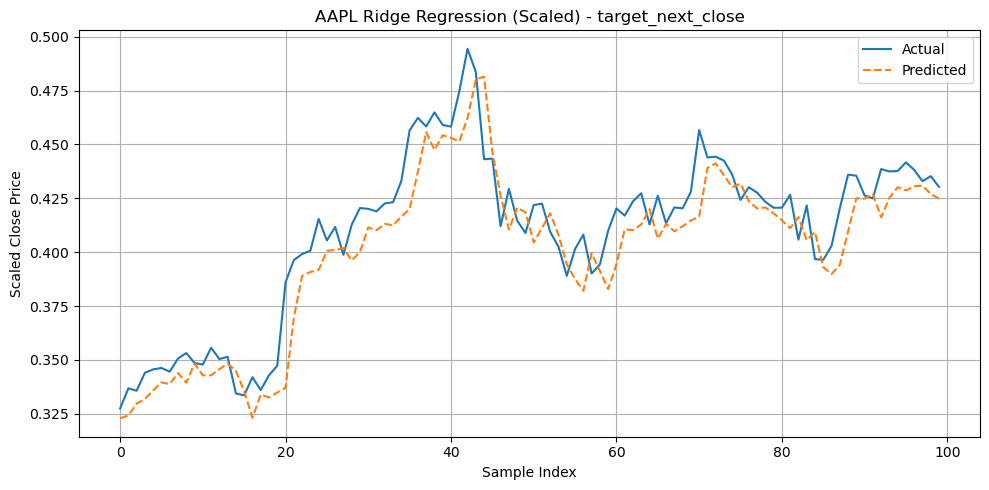

In [15]:
# 12. Plot predictions (scaled)
plt.figure(figsize=(10,5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted', linestyle='--')
plt.title("AAPL Ridge Regression (Scaled) - target_next_close")
plt.xlabel("Sample Index")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# hyper parameter tuning using gridsearchcv

In [16]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_model,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [17]:
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [18]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 1}
-5.8607699818060614e-05


In [19]:
ridge_pred=ridgecv.predict(X_test)
ridge_pred

array([0.32290832, 0.3241975 , 0.32966414, ..., 0.97577368, 0.96633044,
       0.95050506], shape=(1132,))

In [20]:
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)
print("Ridge Regression Performance (Scaled):") 
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R² Score: {r2:.6f}")

Ridge Regression Performance (Scaled):
Mean Squared Error (MSE): 0.000339
Root Mean Squared Error (RMSE): 0.018419
Mean Absolute Error (MAE): 0.015446
R² Score: 0.981793


# forecast

In [21]:
fc_days=5
hist_days=200

In [22]:
def forecast_next_days(model, df, scaler, feature_cols, days):
    """
    Forecast the next `days` days of the un-scaled next_close price.
    
    Parameters:
    - model: trained regression model (e.g., ridgecv)
    - df: original DataFrame (df_aapl) containing un-scaled features and target
    - scaler: MinMaxScaler fitted on df[feature_cols + ['target_next_close']]
    - feature_cols: list of the feature column names, e.g. ['Open','High','Low','Close','Volume']
    - days: number of days to forecast (default 5)
    
    Returns:
    - List of forecasted next_close prices (un-scaled)
    """
    import numpy as np

    # pull the last un-scaled feature vector
    last_feats = df[feature_cols].iloc[-1].values.astype(float)

    # scaler metadata
    feat_min = scaler.data_min_[:len(feature_cols)]
    feat_range = scaler.data_max_[:len(feature_cols)] - feat_min
    targ_min = scaler.data_min_[-1]
    targ_range = scaler.data_max_[-1] - targ_min

    preds = []
    for _ in range(days):
        # scale features
        scaled_feats = (last_feats - feat_min) / feat_range
        # predict next_close in scaled space
        pred_scaled = model.predict(scaled_feats.reshape(1, -1))[0]
        # invert to original scale
        pred = pred_scaled * targ_range + targ_min
        preds.append(pred)
        # update features for next iteration:
        # set Open, High, Low, Close = this prediction, keep Volume constant
        last_feats[:4] = pred

    return preds

# Forecast the next 5 days
preds = forecast_next_days(ridgecv, df_aapl, sc, feature_cols, fc_days)
print(f"Forecasted next {fc_days} days of un-scaled next_close prices:")
print(preds)

Forecasted next 5 days of un-scaled next_close prices:
[np.float64(246.2154618619394), np.float64(240.68726976970953), np.float64(235.3077384533363), np.float64(230.07287021774883), np.float64(224.978774871458)]


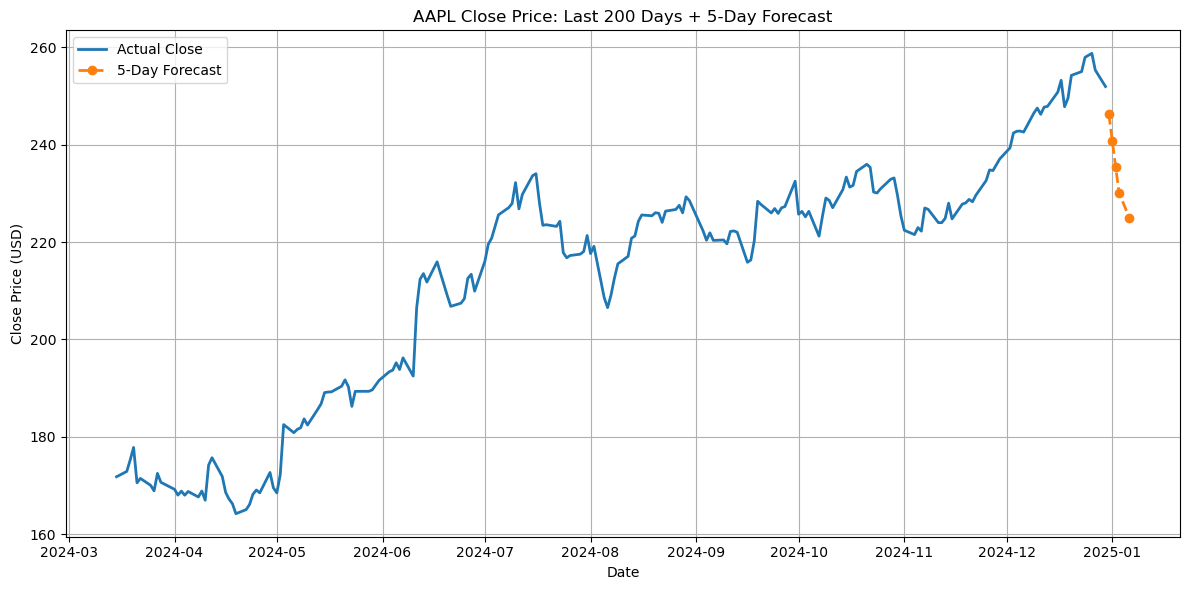

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_history_plus_forecast(model, df, scaler, feature_cols, hist_days, fc_days):
    # 1. Historical data: use the last hist_days of actual Close
    hist = df.set_index('Date')['Close'].iloc[-hist_days:]
    
    # 2. Forecast next fc_days
    #    (using the forecast_next_5_days function from before)
    future_preds = forecast_next_days(model, df, scaler, feature_cols, days=fc_days)
    
    # 3. Build future dates (business days)
    last_date = df['Date'].iloc[-1]
    future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=fc_days)
    
    # 4. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(hist.index, hist.values, label='Actual Close', linewidth=2)
    plt.plot(future_dates, future_preds, 
             label=f'{fc_days}-Day Forecast', marker='o', linestyle='--', linewidth=2)
    plt.title(f"AAPL Close Price: Last {hist_days} Days + {fc_days}-Day Forecast")
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Usage ---
# Assuming you have:
#   - ridgecv    : your trained GridSearchCV-wrapped Ridge model
#   - df_aapl    : the un-scaled AAPL DataFrame with 'Date' & ['Open','High','Low','Close','Volume']
#   - scaler     : your fitted MinMaxScaler
#   - feature_cols = ['Open','High','Low','Close','Volume']

plot_history_plus_forecast(ridgecv, df_aapl, sc, feature_cols, hist_days, fc_days)
